In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt

In [2]:
### import some analysis functions we wrote for this project
import sys ; sys.path.append("..")
from ppe_analysis.analysis import *

In [3]:
# Setup your PBSCluster
import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client
ncores=1
nmem='25GB'
cluster = PBSCluster(
    cores=ncores, # The number of cores you want
    memory=nmem, # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus='+str(ncores)+':mem='+nmem, # Specify resources
    project='P93300641', # Input your project ID here
    walltime='02:00:00', # Amount of wall time
    interface='ib0', # Interface to use
)

# Scale up
cluster.scale(30)

# Setup your client
client = Client(cluster)

In [4]:
client.cluster

In [5]:
csv = '/glade/scratch/djk2120/PPEn11/SP_ensemble.csv'
ds0,la,attrs,paramkey,keys = ppe_init(csv=csv)

### calc via get_ensemble

In [6]:
files = get_files('CTL2010SP','h0',keys)
ds = get_ensemble(files,['FPSN'],keys,paramkey)

In [7]:
x=1/la.sum()*(la*ds.FPSN).mean(dim='time').sum(dim='gridcell').compute()

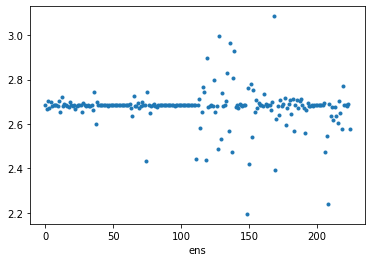

In [8]:
x.plot.line('.')

### via calc_mean

In [10]:
da,iav = calc_mean('CTL2010SP','FPSN',csv=csv)